In [1]:
from datetime import timedelta
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify
print('packages ready to go')

In /Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

packages ready to go


In [2]:
df = pd.read_csv('/Users/lukeyoutsey/Desktop/project_snake/ru_presentation/sample_superstore.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df['Order_Date'] = df['Order Date']
df['Customer_Name'] = df['Customer Name']

In [8]:
snapshot_date = df['Order_Date'].max() + timedelta(days=1)
print(snapshot_date)

2017-12-31 00:00:00


In [9]:
df['Order_Date'].isna().sum() 

0

In [10]:
data_process = df.groupby(['Customer_Name']).agg({
        'Order_Date': lambda x: (snapshot_date - x.max()).days,
        'Quantity': 'sum',
        'Sales': 'sum'})

In [11]:
data_process.head()

,Order_Date,Quantity,Sales
Customer_Name,,,
Aaron Bergman,416,13,886.156
Aaron Hawkins,13,54,1744.700
Aaron Smayling,89,48,3050.692
Adam Bellavance,55,56,7755.620
Adam Hart,35,75,3250.337


In [12]:
data_process.rename(columns={'Order_Date': 'Recency',
                         'Quantity': 'Frequency',
                         'Sales': 'MonetaryValue'}, inplace=True)

/Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lukeyoutsey/miniconda3/envs/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

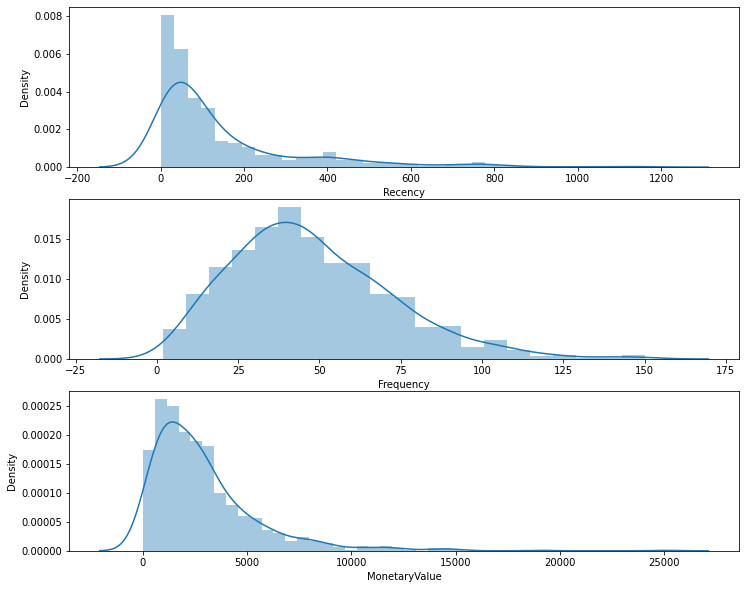

In [13]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [16]:
# Create labels for Recency, Frequency and MonetaryValue
r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels, duplicates = 'drop')
# Create new columns R, F and M
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer_Name,,,,,,
Aaron Bergman,416,13,886.156,1,1,1
Aaron Hawkins,13,54,1744.700,4,3,2
Aaron Smayling,89,48,3050.692,2,3,3
Adam Bellavance,55,56,7755.620,3,3,4
Adam Hart,35,75,3250.337,3,4,3


In [17]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
Customer_Name,,,,,,,
Aaron Bergman,416,13,886.156,1,1,1,111
Aaron Hawkins,13,54,1744.700,4,3,2,432
Aaron Smayling,89,48,3050.692,2,3,3,233
Adam Bellavance,55,56,7755.620,3,3,4,334
Adam Hart,35,75,3250.337,3,4,3,343


In [18]:
#take a look at how many combinations of segments we have 

data_process['RFM_Segment_Concat'].unique()

array(['111', '432', '233', '334', '343', '443', '344', '342', '311',
       '321', '431', '424', '312', '434', '121', '221', '133', '423',
       '211', '114', '421', '212', '412', '123', '122', '243', '411',
       '322', '433', '144', '244', '222', '444', '332', '132', '231',
       '224', '223', '124', '213', '442', '323', '214', '112', '234',
       '422', '413', '113', '324', '134', '242', '232', '333', '141',
       '314', '143', '331', '131', '313', '142'], dtype=object)

In [19]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

Customer_Name
Aaron Bergman       3.0
Aaron Hawkins       9.0
Aaron Smayling      8.0
Adam Bellavance    10.0
Adam Hart          10.0
Name: RFM_Score, dtype: float64


In [20]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Lose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
Customer_Name,,,,,,,,,
Aaron Bergman,416,13,886.156,1,1,1,111,3.0,Require Activation
Aaron Hawkins,13,54,1744.700,4,3,2,432,9.0,Can't Lose Them
Aaron Smayling,89,48,3050.692,2,3,3,233,8.0,Champions
Adam Bellavance,55,56,7755.620,3,3,4,334,10.0,Can't Lose Them
Adam Hart,35,75,3250.337,3,4,3,343,10.0,Can't Lose Them


In [21]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Lose Them       64.4      70.1        4823.8   302
Champions             93.8      46.6        2779.2   104
Loyal                145.3      42.5        2491.1    87
Needs Attention      293.8      24.3         945.7    69
Potential            131.9      33.8        1470.1    95
Promising            209.5      29.1        1260.0    83
Require Activation   475.2      16.3         474.6    53


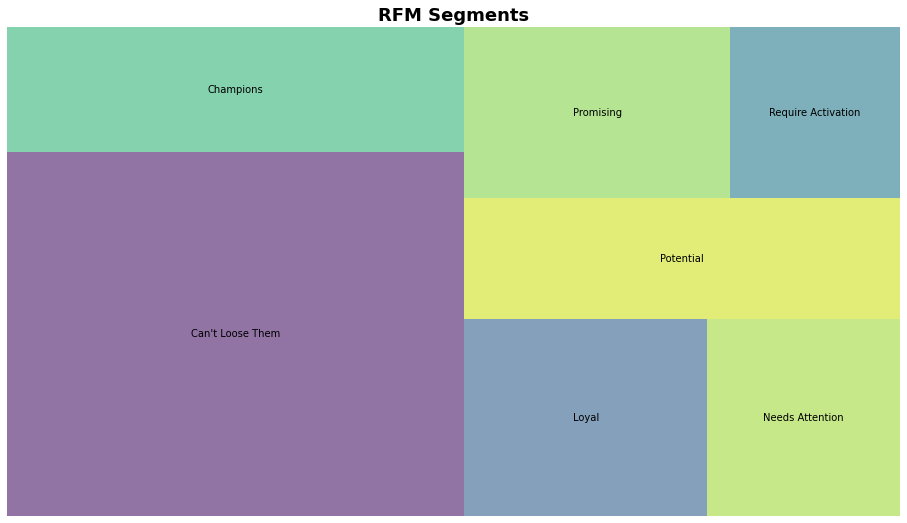

In [22]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()